In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')  # 형태소 분석

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [5]:
from konlpy.tag import Hannanum

hannanum = Hannanum()

In [8]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [9]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [10]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [6]:
from konlpy.tag import Okt
t = Okt()

In [12]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [13]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [14]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

In [7]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [8]:
text = open("./nlp/06_alice.txt").read()
alice_mask = np.array(Image.open("./nlp/06_alice_mask.png"))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [9]:
print(text)

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without picture

In [9]:
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [10]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')

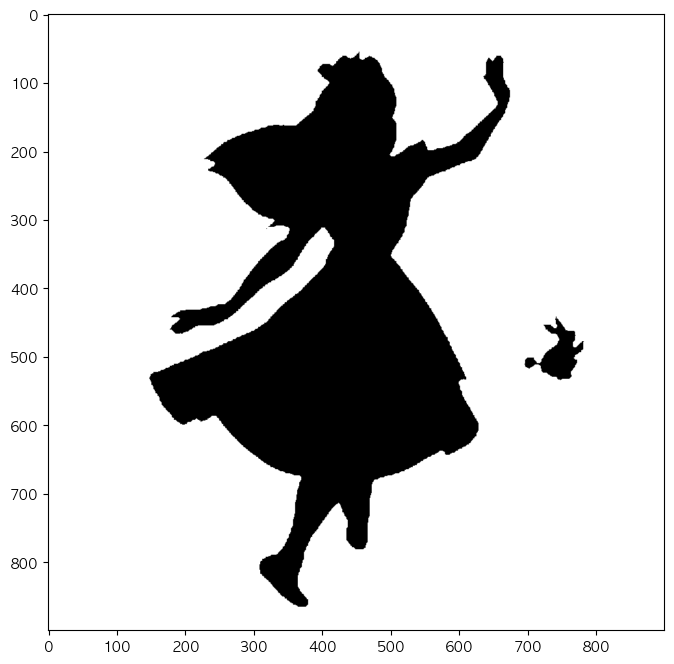

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')  # image show
# interpolation: 화질 좋게

In [12]:
wc = WordCloud(
    background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords
)

wc = wc.generate(text)

발생빈도

In [13]:
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

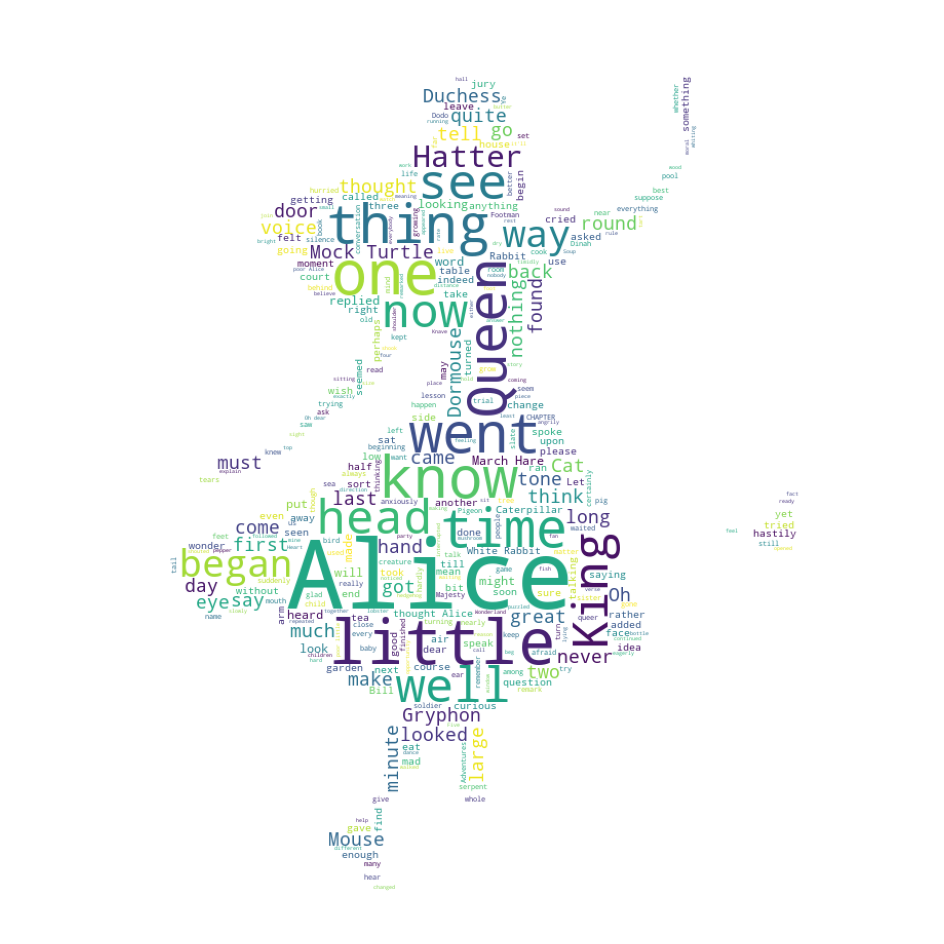

In [23]:
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
text = open('./nlp/06_a_new_hope.txt').read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('./nlp/06_stormtrooper_mask.png'))

In [25]:
stopwords.add('int')
stopwords.add('ext')

In [26]:
wc = WordCloud(
    max_words=1000, mask=mask, stopwords=stopwords, margin=10
).generate(text)

In [27]:
default_colors = wc.to_array()

In [28]:
default_colors

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

그레이톤으로 그리기 위한 색상함수

In [31]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)

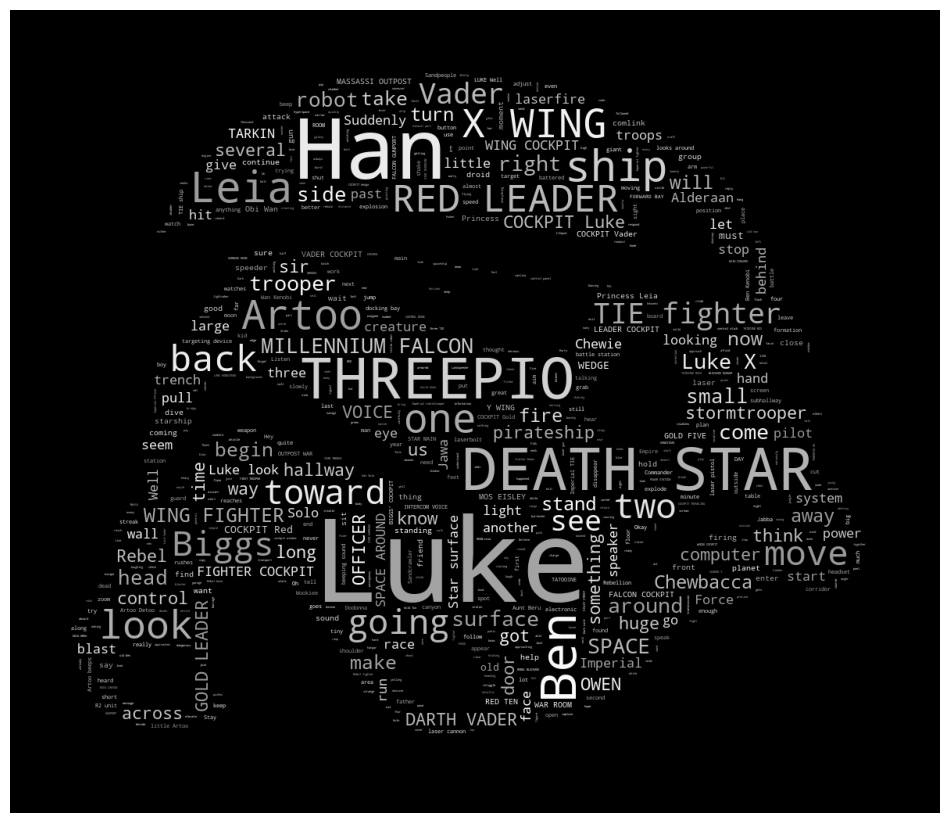

In [32]:
plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=13))
plt.axis('off')
plt.show()

### 육아휴직 법안 분석

In [33]:
import nltk

In [34]:
from konlpy.corpus import kobill

doc_ko = kobill.open('1809890.txt').read()

In [37]:
print(doc_ko)

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제63조제2항제4호).

- 1 -

법률  제        호

지방공무원법 일부개정법률안

지방공무원법 일부를 다음과 같이 개정한다.

제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 

8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”

로 한다.

부      칙

이 법은 공포한 날부터 시행한다.

- 3 -

신 ·구조문대비표

현      행

개   정   안

제63조(휴직) ① (생  략)

제63조(휴직) ① (현행과 같음)

  ② 공무원이 다음 각 호의 어

  ② -------------------------

느 하나에 해당하는 사유로 휴

----------------------------

직을 원하면 임용권자는 휴직

----------------------------

을 명할 수 있다. 다만, 제4호

-------------.---------------

의 경우에는 대통령령으로 정

----------------------------

하는 특별한 사정이 없으면 휴

----------------------------

직을 명하여야 한다.

--------------.

  1. ∼ 3.

In [38]:
t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [39]:
ko = nltk.Text(tokens_ko, name='육아휴직법')
ko

<Text: 육아휴직법>

In [40]:
len(ko.tokens)

735

In [41]:
len(set(ko.tokens))

250

In [42]:
ko.vocab() # 어떤 단어들 있음?

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

가장 많이 쓰인 단어 50개

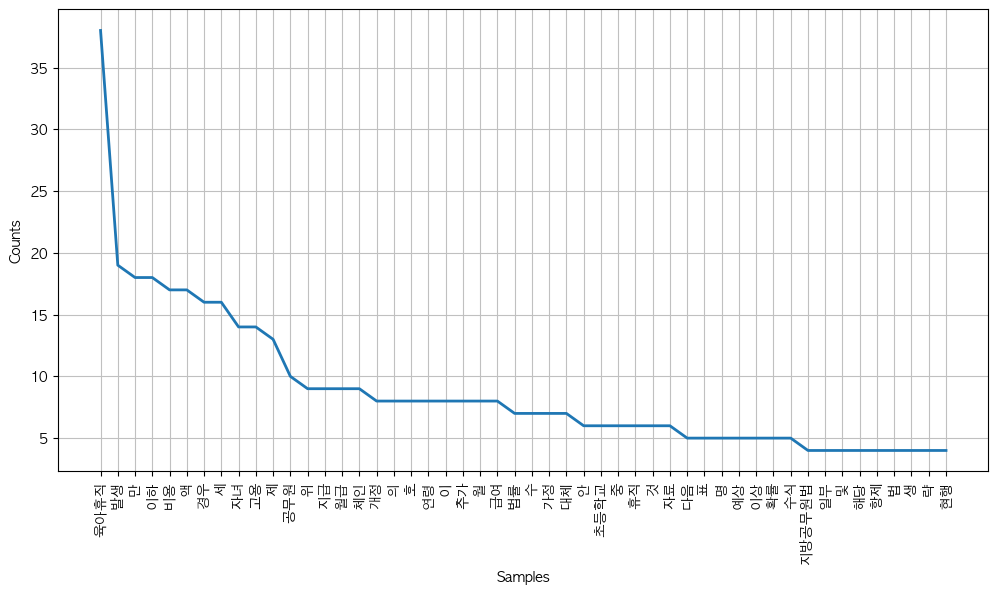

In [43]:
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

한글은 보통 stopwords 일일히 잡음

In [44]:
stop_words = [
    '.',
    '(',
    ')',
    ',',
    "'",
    '%',
    '-',
    'X',
    ').',
    'x',
    '의',
    '자',
    '에',
    '안',
    '에',
    '번',
    '호',
    '을',
    '이',
    '다',
    '만',
    '로',
    '가',
    '를'
]

In [46]:
ko = [each_word for each_word in ko if each_word not in stop_words]

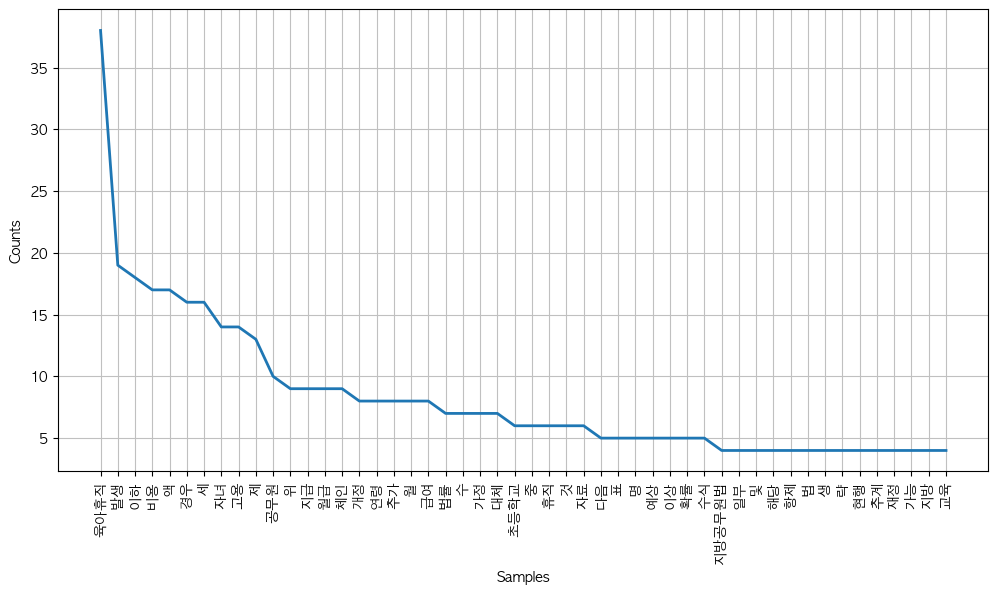

In [47]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

단어 빈도수

In [48]:
ko.count('초등학교')

6

단어가 어디쯤 위치하고 있는지

<Figure size 1200x600 with 0 Axes>

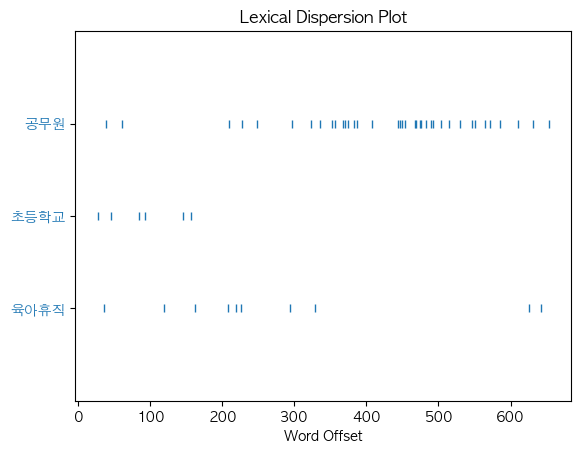

In [55]:
plt.figure(figsize=(12, 6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [57]:
ko.concordance('초등학교') # 초등학교 좌우에 있는 글자들 보여줌

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [58]:
ko.collocations()  # 연관 있어 보이는 단어들 보여줌

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


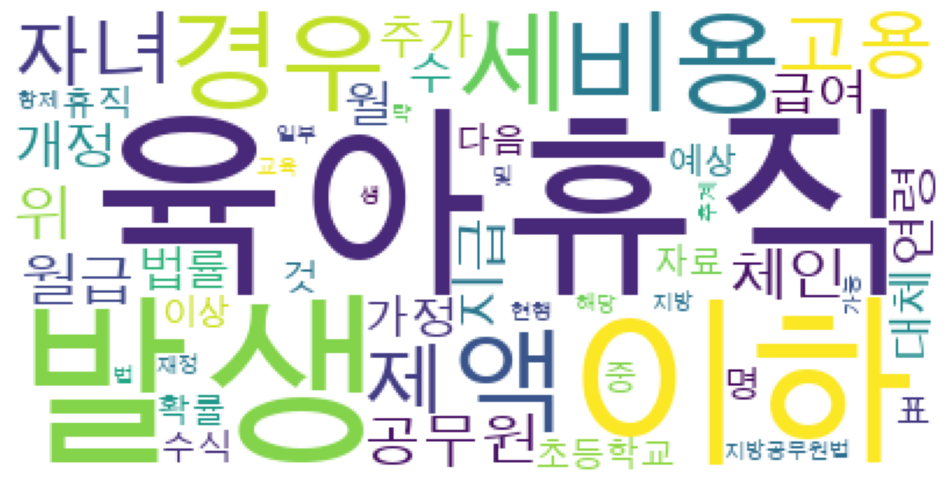

In [60]:
data = ko.vocab().most_common(50)

wordcloud = WordCloud(
    font_path='/Library/Fonts/Arial Unicode.ttf',
    relative_scaling=0.2,  # wordcloud 단어 사이 간격
    background_color='white'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 나이브 베이즈 분류 Naive Bayes Classifier

In [61]:
from nltk.tokenize import word_tokenize
import nltk

naive bayes 분류기는 지도학습이라서 정답 알려줘야 함

In [62]:
train = [
    ('I like you', 'pos'),
    ('I hate you', 'neg'),
    ('you like me', 'neg'),
    ('i like her', 'pos')
]

전체 말뭉치 만들기

In [64]:
train[0]

('I like you', 'pos')

In [65]:
sentence = train[0][0]
word_tokenize(sentence[0])

['I']

In [63]:
all_words = set(
    word.lower() for sentence in train for word in word_tokenize(sentence[0])
)
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

말뭉치 대비 단어가 있고 없음을 표기

In [66]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'you': True,
   'her': False,
   'me': False,
   'like': True,
   'i': False,
   'hate': False},
  'pos'),
 ({'you': True,
   'her': False,
   'me': False,
   'like': False,
   'i': False,
   'hate': True},
  'neg'),
 ({'you': True,
   'her': False,
   'me': True,
   'like': True,
   'i': False,
   'hate': False},
  'neg'),
 ({'you': False,
   'her': True,
   'me': False,
   'like': True,
   'i': True,
   'hate': False},
  'pos')]

In [67]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = False             neg : pos    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


- hate 이 없다는 것이 1.7 : 1의 확률로 positive

In [70]:
test_sentence = 'i like MeRui'

test_sent_features = {
    word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words
}
test_sent_features

{'you': False,
 'her': False,
 'me': False,
 'like': True,
 'i': True,
 'hate': False}

In [71]:
classifier.classify(test_sent_features)

'pos'

- positive으로 추측
- '감성 분석'

In [73]:
from konlpy.tag import Okt
pos_tagger = Okt()

형태소 분석 안 하고 해보기

In [75]:
train = [
    ('메리가 좋아', 'pos'),
    ('고양이도 좋아', 'pos'),
    ('난 수업이 지루해', 'neg'),
    ('메리는 이쁜 고양이야', 'pos'),
    ('난 마치고 메리랑 놀거야', 'pos')
]

In [76]:
all_words = set(
    word for sentence in train for word in word_tokenize(sentence[0])
)
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [77]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'마치고': False,
   '이쁜': False,
   '메리랑': False,
   '수업이': False,
   '놀거야': False,
   '지루해': False,
   '메리가': True,
   '메리는': False,
   '좋아': True,
   '고양이야': False,
   '난': False,
   '고양이도': False},
  'pos'),
 ({'마치고': False,
   '이쁜': False,
   '메리랑': False,
   '수업이': False,
   '놀거야': False,
   '지루해': False,
   '메리가': False,
   '메리는': False,
   '좋아': True,
   '고양이야': False,
   '난': False,
   '고양이도': True},
  'pos'),
 ({'마치고': False,
   '이쁜': False,
   '메리랑': False,
   '수업이': True,
   '놀거야': False,
   '지루해': True,
   '메리가': False,
   '메리는': False,
   '좋아': False,
   '고양이야': False,
   '난': True,
   '고양이도': False},
  'neg'),
 ({'마치고': False,
   '이쁜': True,
   '메리랑': False,
   '수업이': False,
   '놀거야': False,
   '지루해': False,
   '메리가': False,
   '메리는': True,
   '좋아': False,
   '고양이야': True,
   '난': False,
   '고양이도': False},
  'pos'),
 ({'마치고': True,
   '이쁜': False,
   '메리랑': True,
   '수업이': False,
   '놀거야': True,
   '지루해': False,
   '메리가': False,
   '메리는': False,
   '좋아': False,
   '고양이야':

In [78]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0


- 분석 제대로 안됨

In [79]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

test_sent_features = {
    word: (word in word_tokenize(test_sentence)) for word in all_words
}
test_sent_features

{'마치고': False,
 '이쁜': False,
 '메리랑': True,
 '수업이': True,
 '놀거야': True,
 '지루해': False,
 '메리가': False,
 '메리는': False,
 '좋아': False,
 '고양이야': False,
 '난': True,
 '고양이도': False}

In [82]:
classifier.classify(test_sent_features)

'neg'

--> 긍정적 어감인데 neg으로 나옴

- 한국어는 형태소 분석이 필수

In [83]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [88]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

풀어서 말뭉치 만들기

In [89]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [90]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [91]:
train_xy = [(term_exists(d), c) for d, c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [92]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)
classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0


In [93]:
test_sentence = [('난 수업이 마치면 메리랑 놀거야')]

test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [94]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [95]:
classifier.classify(test_sent_features)

'pos'

### 유사도 측정
- 지도학습 아님
- 따라서 라벨 필요 없음

In [96]:
from sklearn.feature_extraction.text import CountVectorizer # 글자 세는 것

vectorizer = CountVectorizer(min_df=1)

In [97]:
contents = [
    '상처받은 아이들은 너무 일찍 커버려',
    '내가 상처받은 거 아는 사람 불편해',
    '잘 사는 사람들은 좋은 사람 되기 쉬워',
    '아무 일도 아니아 괜찮아'
]

형태소 분석 엔진: Okt

In [98]:
t = Okt()

In [99]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['상처', '받은', '아이', '들', '은', '너무', '일찍', '커버', '려'],
 ['내', '가', '상처', '받은', '거', '아는', '사람', '불편해'],
 ['잘', '사는', '사람', '들', '은', '좋은', '사람', '되기', '쉬워'],
 ['아무', '일도', '아니아', '괜찮아']]

형태소 분석된 결과를 다시 하나의 문장씩으로 합침

In [102]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    
    contents_for_vectorize.append(sentence)

contents_for_vectorize

[' 상처 받은 아이 들 은 너무 일찍 커버 려',
 ' 내 가 상처 받은 거 아는 사람 불편해',
 ' 잘 사는 사람 들 은 좋은 사람 되기 쉬워',
 ' 아무 일도 아니아 괜찮아']

In [104]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<4x17 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [105]:
num_samples, num_features = X.shape
num_samples, num_features

(4, 17)

--> 4개의 문장, 전체 말뭉치의 단어 17개

In [108]:
len(vectorizer.get_feature_names())

/Users/jhpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


17

In [109]:
X.toarray().transpose()

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 2, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

- toarray: 열 방향이 하나의 문장

In [115]:
new_post = ['상처받기 싫어 괜찮아']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    
    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 상처 받기 싫어 괜찮아']

벡터로 표현 - 거리 구할 수 있음

In [116]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

기하학적 거리 계산해보기

In [164]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [118]:
dist = [dist_raw(each, new_post_vec) for each in X]
dist

[2.449489742783178, 2.23606797749979, 3.1622776601683795, 2.0]

In [119]:
print('Best post is ', dist.index(min(dist)), ', dist = ', min(dist))
print('Test post is --> ', new_post),
print('Best dist post is --> ', contents[dist.index(min(dist))])

Best post is  3 , dist =  2.0
Test post is -->  ['상처받기 싫어 괜찮아']
Best dist post is -->  아무 일도 아니아 괜찮아


- 3번 post이 가장 가까운 post

In [120]:
for i in range(0, len(contents)):
    print(X.getrow(1).toarray())

print('-' * 40)
print(new_post_vec.toarray())

[[0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0]]
[[0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0]]
[[0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0]]
[[0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0]]
----------------------------------------
[[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


- tf-idf

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [122]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<4x17 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [123]:
X.toarray().transpose()

array([[0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.40104275, 0.6191303 , 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.43671931, 0.        , 0.        , 0.        ]])

- 가중치, 역가중치 반영됨

In [124]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0.78528828, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6191303 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [127]:
# 거리 normalize해서 측정
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())

    delta = v1_normalized - v2_normalized

    return sp.linalg.norm(delta.toarray())

In [128]:
dist = [dist_norm(each, new_post_vec) for each in X]
dist

[1.2544516324460193, 1.2261339938790283, 1.414213562373095, 1.1021396119773588]

In [129]:
import urllib.request
import json
import datetime

- gen_search_url()

In [130]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = 'https://openapi.naver.com/v1/search'
    node = '/' + api_node + '.json'
    param_query = '?query=' + urllib.parse.quote(search_text) 
    param_start = '&start=' + str(start_num)
    param_disp = '&display=' + str(disp_num)

    return base + node + param_query + param_start + param_disp

- get_result_onpage()

In [135]:
def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header('X-Naver-Client-Id', client_id)
    request.add_header('X-Naver-Client-Secret', client_secret)

    response = urllib.request.urlopen(request)

    print('[%s] Url Request Success' % datetime.datetime.now())

    return json.loads(response.read().decode('utf-8'))

In [138]:
client_id = 'DgzFfS1mstITlSVK_xMG'
client_secret = 'OfZnz4Vp6E'

url = gen_search_url('kin', '파이썬', 10, 100)  # 지식인
one_result = get_result_onpage(url)
one_result

[2023-11-02 14:36:47.895048] Url Request Success


{'lastBuildDate': 'Thu, 02 Nov 2023 14:36:47 +0900',
 'total': 273257,
 'start': 10,
 'display': 100,
 'items': [{'title': '<b>파이썬</b> 설치 질문',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10402&docId=456640078&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=10&search_sort=0&spq=0',
   'description': '인터넷에 검색해보니 다른분들은 <b>파이썬</b> 설치 한 후 파일을 실행하면 첫번째 사진처럼 창이 뜬다고 하는데 왜 저는... 어떻게 해야하나요...ㅠㅠ  <b>파이썬</b>은 여러기지 종류가 있읍니다 윈도우용중에서 embeddable를 하신것 같네요'},
  {'title': '<b>파이썬</b> 코드 py로 저장하는 법',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10402&docId=454001377&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=11&search_sort=0&spq=0',
   'description': '<b>파이썬</b> 과제하는데 코드 쓰고 저장한거 실행하니까 .py가 아니라 py.exe네요 소스코드 제출해야하는데 어떻게 해야하나요  그냥 <b>파이썬</b> IDLE Shell 키고 CTRL + N 눌러서 새 파일 만들고 저장하면 파일명.py로 저장될텐데요'},
  {'title': '<b>파이썬</b> 병렬 프로그래밍',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=104&docId=457207180&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=12&sea

In [145]:
one_result['items'][0]['description']

'인터넷에 검색해보니 다른분들은 <b>파이썬</b> 설치 한 후 파일을 실행하면 첫번째 사진처럼 창이 뜬다고 하는데 왜 저는... 어떻게 해야하나요...ㅠㅠ  <b>파이썬</b>은 여러기지 종류가 있읍니다 윈도우용중에서 embeddable를 하신것 같네요'

- delete_tag()

In [146]:
def delete_tag(input_str):
    input_str = input_str.replace('<b>', '')
    input_str = input_str.replace('</b>', '')
    return input_str

In [149]:
# description 만 갖고옴
def get_description(pages):
    contents = []

    for sentences in pages['items']:
        contents.append(delete_tag(sentences['description']))

    return contents

In [150]:
contents = get_description(one_result)
contents

['인터넷에 검색해보니 다른분들은 파이썬 설치 한 후 파일을 실행하면 첫번째 사진처럼 창이 뜬다고 하는데 왜 저는... 어떻게 해야하나요...ㅠㅠ  파이썬은 여러기지 종류가 있읍니다 윈도우용중에서 embeddable를 하신것 같네요',
 '파이썬 과제하는데 코드 쓰고 저장한거 실행하니까 .py가 아니라 py.exe네요 소스코드 제출해야하는데 어떻게 해야하나요  그냥 파이썬 IDLE Shell 키고 CTRL + N 눌러서 새 파일 만들고 저장하면 파일명.py로 저장될텐데요',
 '파이썬 병렬 프로그래밍 어떻게 하나요? 병렬이... 파이썬에서 병렬 프로그래밍은 여러 작업을... 파이썬에서 병렬 프로그래밍을 수행하는 주요... 멀티스레딩 (Multithreading) 파이썬의 threading 모듈을... ',
 '블렌더에 파이썬 창이 있던데 그냥 작업하는 거랑은 다른가요? 더 좋은 점이라던가 이걸 쓰는 이유를... 블렌더는 파이썬으로 프로그래밍 되어있기때문에 따로 스크립트언어를 사용하지 않고 파이썬을 그대로 사용하는걸로... ',
 '파이썬이나 딥러닝 하나도 모르는데 오류 해결 좀 해주세요 import matplotlib.pyplot as plt 이거 맨 위에 추가하세요. 그래도 오류뜨면 cmd에 pip install matplotlib 입력하세요. ',
 '요즘시기의 경우 IT, 정보통신계열에 취업하지않더라도 파이썬, C, C++, 자바는 배워두는게 좋습니까?  KG아이티뱅크... C++까진 아니어도 파이썬, 자바, C정도는 알고 있는 것이 좋습니다. :) 도움이 되셨다면 채택 부탁드립니다 :)',
 "파이썬 기초를 다지는데 좋은 책 추천해주시면 감사하겠습니다. 유튜브 동영상 강의나 도움이 될만한 사이트... 책은 '모두위 파이썬' 추천드리고, 기초 다지기 좋은 강의로는 노마드 코더스 (nomadcoders.co)의 파이썬 웹 스크래퍼 강좌가... ",
 '... 취업을 하려고하는데 파이썬자격증이 궁금해요. 많이 사용되는 언어 중에서 파이썬 관련하여 자격증을..

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

In [152]:
t = Okt()
vectorizer = CountVectorizer(min_df=1)

In [153]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['인터넷',
  '에',
  '검색',
  '해보니',
  '다른',
  '분들',
  '은',
  '파이썬',
  '설치',
  '한',
  '후',
  '파일',
  '을',
  '실행',
  '하면',
  '첫',
  '번째',
  '사진',
  '처럼',
  '창',
  '이',
  '뜬다고',
  '하는데',
  '왜',
  '저',
  '는',
  '...',
  '어떻게',
  '해야하나요',
  '...',
  'ㅠㅠ',
  '파이썬',
  '은',
  '여러',
  '기지',
  '종류',
  '가',
  '있',
  '읍니',
  '다',
  '윈도우',
  '용',
  '중',
  '에서',
  'embeddable',
  '를',
  '하신것',
  '같네요'],
 ['파이썬',
  '과제',
  '하는데',
  '코드',
  '쓰고',
  '저장',
  '한',
  '거',
  '실행',
  '하',
  '니까',
  '.',
  'py',
  '가',
  '아니라',
  'py',
  '.',
  'exe',
  '네요',
  '소스코드',
  '제출',
  '해야하는데',
  '어떻게',
  '해야하나요',
  '그냥',
  '파이썬',
  'IDLE',
  'Shell',
  '키',
  '고',
  'CTRL',
  '+',
  'N',
  '눌러서',
  '새',
  '파일',
  '만들고',
  '저장',
  '하면',
  '파일명',
  '.',
  'py',
  '로',
  '저장',
  '될텐데요'],
 ['파이썬',
  '병렬',
  '프로그래밍',
  '어떻게',
  '하나요',
  '?',
  '병렬',
  '이',
  '...',
  '파이썬',
  '에서',
  '병렬',
  '프로그래밍',
  '은',
  '여러',
  '작업',
  '을',
  '...',
  '파이썬',
  '에서',
  '병렬',
  '프로그래밍',
  '을',
  '수행',
  '하는',
  '주요',
  '...',
  '멀티스레딩

In [156]:
len(contents_tokens)

100

In [158]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word

    contents_for_vectorize.append(sentence)

contents_for_vectorize

[' 인터넷 에 검색 해보니 다른 분들 은 파이썬 설치 한 후 파일 을 실행 하면 첫 번째 사진 처럼 창 이 뜬다고 하는데 왜 저 는 ... 어떻게 해야하나요 ... ㅠㅠ 파이썬 은 여러 기지 종류 가 있 읍니 다 윈도우 용 중 에서 embeddable 를 하신것 같네요',
 ' 파이썬 과제 하는데 코드 쓰고 저장 한 거 실행 하 니까 . py 가 아니라 py . exe 네요 소스코드 제출 해야하는데 어떻게 해야하나요 그냥 파이썬 IDLE Shell 키 고 CTRL + N 눌러서 새 파일 만들고 저장 하면 파일명 . py 로 저장 될텐데요',
 ' 파이썬 병렬 프로그래밍 어떻게 하나요 ? 병렬 이 ... 파이썬 에서 병렬 프로그래밍 은 여러 작업 을 ... 파이썬 에서 병렬 프로그래밍 을 수행 하는 주요 ... 멀티스레딩 ( Multithreading ) 파이썬 의 threading 모듈 을 ...',
 ' 블렌더 에 파이썬 창 이 있던데 그냥 작업 하는 거 랑은 다른 가요 ? 더 좋은 점 이 라던가 이 걸 쓰는 이유 를 ... 블렌더 는 파이썬 으로 프로그래밍 되어있기 때문 에 따로 스크립트 언어 를 사용 하지 않고 파이썬 을 그대로 사용 하 는걸 로 ...',
 ' 파이썬 이나 딥 러닝 하나 도 모르는데 오류 해결 좀 해주세요 import matplotlib . pyplot as plt 이 거 맨 위 에 추가 하세요 . 그래도 오류 뜨면 cmd 에 pip install matplotlib 입력 하세요 .',
 ' 요즘 시기 의 경우 IT , 정보통 신 계열 에 취업 하지 않더라도 파이썬 , C , C ++, 자바 는 배워 두는게 좋습니까 ? KG 아이티 뱅크 ... C ++ 까진 아니어도 파이썬 , 자바 , C 정도 는 알 고 있는 것 이 좋습니다 . :) 도움 이 되셨다면 채택 부탁드립니다 :)',
 " 파이썬 기초 를 다지는데 좋은 책 추천 해주시면 감사하겠습니다 . 유튜브 동영상 강의 나 도움 이 될만 한 사이트 ... 책 은 ' 모두 위 파이썬 ' 

In [159]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<100x1132 sparse matrix of type '<class 'numpy.int64'>'
	with 2222 stored elements in Compressed Sparse Row format>

In [160]:
num_samples, num_features = X.shape
num_samples, num_features

(100, 1132)

In [161]:
new_post = ['파이썬을 배우는데 좋은 방법이 어떤 것인지 추천해주세요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    
    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 파이썬 을 배우는데 좋은 방법 이 어떤 것 인지 추천 해주세요']

In [162]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [166]:
dist = [dist_raw(each, new_post_vec) for each in X]
dist

[5.744562646538029,
 7.0,
 7.416198487095663,
 6.164414002968976,
 5.744562646538029,
 5.916079783099616,
 6.082762530298219,
 7.280109889280518,
 7.0710678118654755,
 6.324555320336759,
 6.855654600401044,
 7.0,
 7.681145747868608,
 7.211102550927978,
 4.795831523312719,
 5.196152422706632,
 14.832396974191326,
 23.0,
 6.928203230275509,
 6.855654600401044,
 5.830951894845301,
 8.888194417315589,
 7.681145747868608,
 6.244997998398398,
 5.656854249492381,
 6.708203932499369,
 6.6332495807108,
 6.244997998398398,
 6.928203230275509,
 6.4031242374328485,
 6.557438524302,
 5.385164807134504,
 5.0990195135927845,
 8.774964387392123,
 7.3484692283495345,
 5.916079783099616,
 7.0710678118654755,
 8.18535277187245,
 6.244997998398398,
 6.164414002968976,
 7.54983443527075,
 7.615773105863909,
 9.38083151964686,
 6.164414002968976,
 6.855654600401044,
 6.708203932499369,
 13.74772708486752,
 5.5677643628300215,
 6.6332495807108,
 7.14142842854285,
 5.830951894845301,
 7.14142842854285,
 4.358

In [167]:
min(dist)

4.358898943540674

In [168]:
dist.index(min(dist))

52

52번째 글이 제일 잘 맞았음

In [169]:
contents[dist.index(min(dist))]

'파이썬 풀다가 의문이 생겼어요 화질구린거 양해부탁드려요 ㅠ [1, 2, 3] 나옵니다. 입력할 때 무엇을 틀렸는지 확인하십시오. '

--> 52번째 글